In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("./walmart-sales-dataset-of-45stores.csv ",parse_dates=['Date'])

In [3]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
data.sort_values(by='Date',inplace=True)

In [5]:
data.reset_index(drop=True,inplace=True)

In [6]:
data['year']=data.Date.dt.year
data['month']=data.Date.dt.month
data['day']=data.Date.dt.day


In [7]:
data.drop(columns=['Date'],inplace=True)

In [8]:
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,5,283178.12,0,71.10,2.603,212.226946,6.768,2010,1,10
1,15,566945.95,0,59.69,2.840,132.756800,8.067,2010,1,10
2,42,481523.93,0,86.01,3.001,126.234600,9.003,2010,1,10
3,33,224294.39,0,91.45,3.001,126.234600,9.265,2010,1,10
4,36,422169.47,0,74.66,2.567,210.440443,8.476,2010,1,10
...,...,...,...,...,...,...,...,...,...,...
6430,41,1409544.97,0,39.38,3.760,199.053937,6.195,2012,12,10
6431,16,491817.19,0,43.26,3.760,199.053937,5.847,2012,12,10
6432,10,1713889.11,0,76.03,4.468,131.108333,6.943,2012,12,10
6433,25,697317.41,0,43.74,4.000,216.115057,7.293,2012,12,10


In [9]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.475524,15.650350
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.321797,8.753908
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,8.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,16.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,23.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,31.000000


In [10]:
data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
year            0
month           0
day             0
dtype: int64

In [11]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,5,283178.12,0,71.10,2.603,212.226946,6.768,2010,1,10
1,15,566945.95,0,59.69,2.840,132.756800,8.067,2010,1,10
2,42,481523.93,0,86.01,3.001,126.234600,9.003,2010,1,10
3,33,224294.39,0,91.45,3.001,126.234600,9.265,2010,1,10
4,36,422169.47,0,74.66,2.567,210.440443,8.476,2010,1,10


<Axes: xlabel='Unemployment', ylabel='Count'>

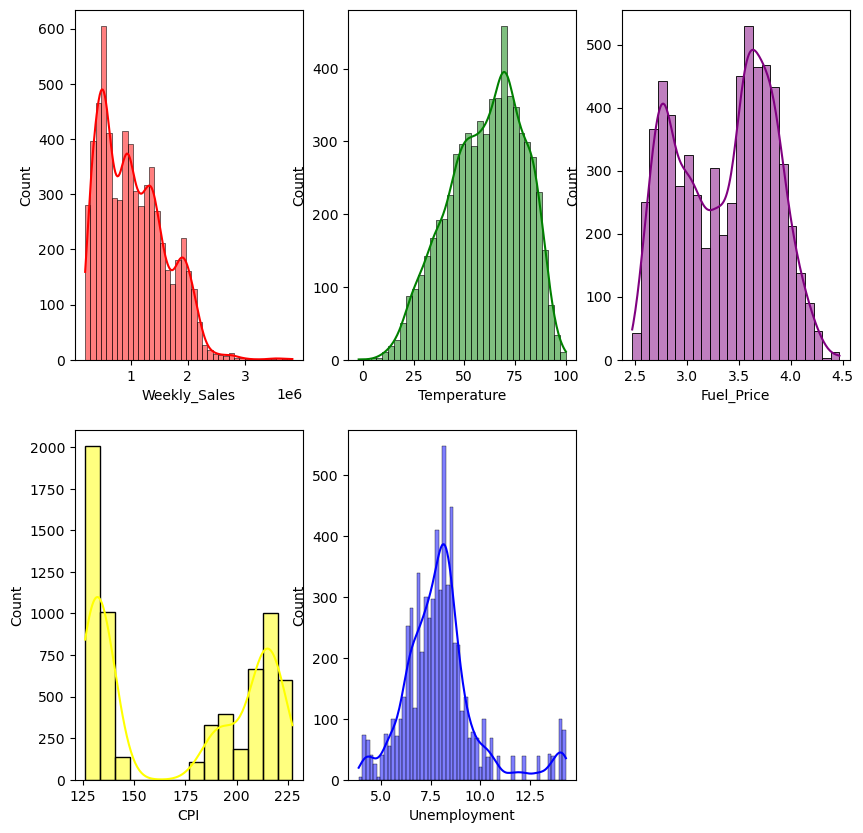

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
sns.histplot(data=data,kde=True,x='Weekly_Sales',color='red')

plt.subplot(2,3,2)
sns.histplot(data=data,kde=True,x='Temperature',color='green')


plt.subplot(2,3,3)
sns.histplot(data=data,kde=True,x='Fuel_Price',color='purple')

plt.subplot(2,3,4)
sns.histplot(data=data,kde=True,x='CPI',color='yellow')

plt.subplot(2,3,5)
sns.histplot(data=data,kde=True,x='Unemployment',color='blue')

In [13]:
data.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'year', 'month', 'day'],
      dtype='object')

In [14]:
col_list=[ 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment']

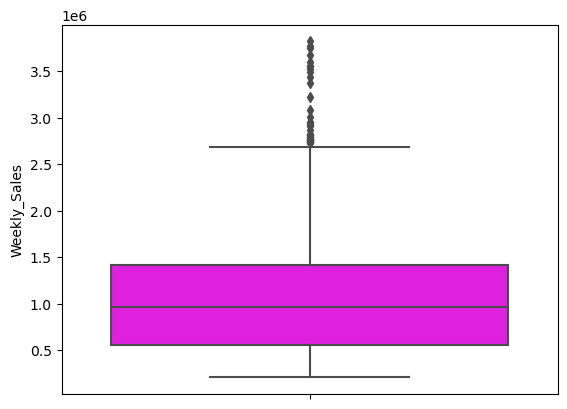

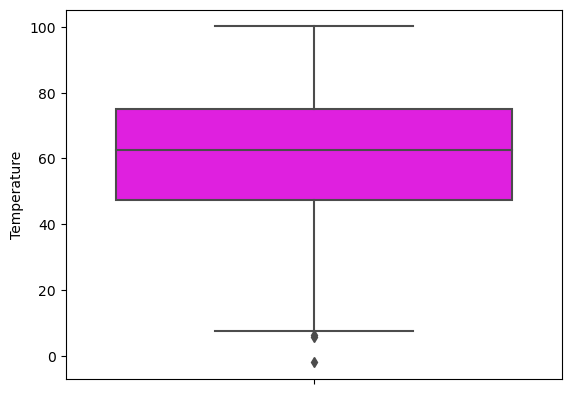

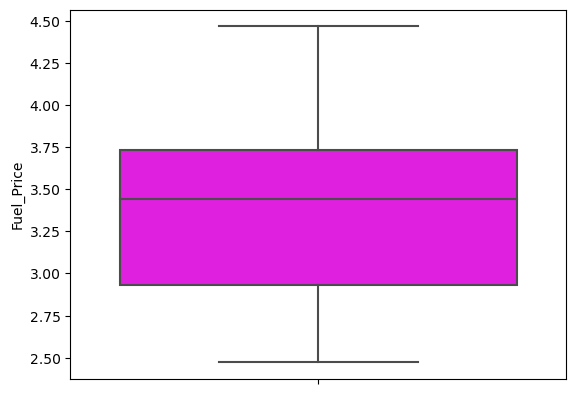

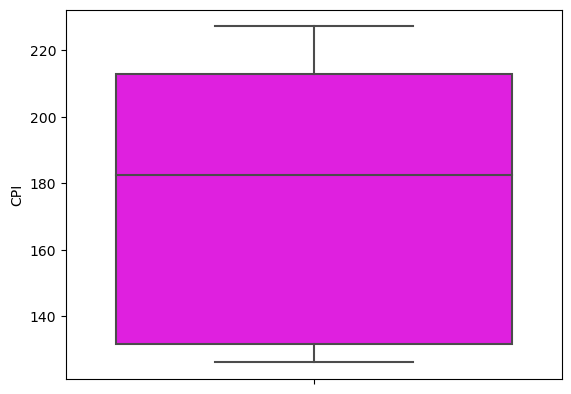

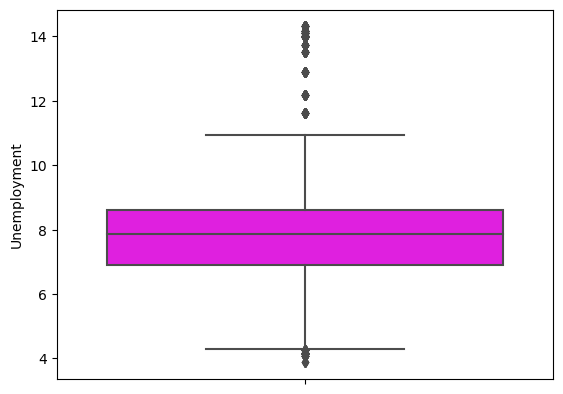

In [15]:
for i in col_list:
    sns.boxplot(y=data[i],data=data,color='magenta')
    plt.show()

<Axes: xlabel='Unemployment'>

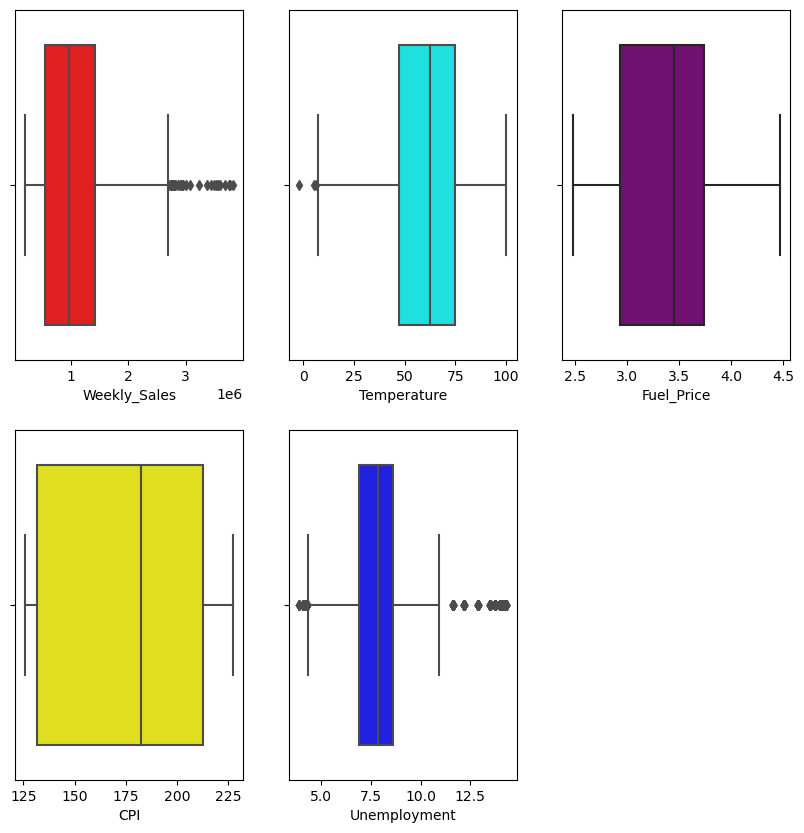

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
sns.boxplot(data=data,x='Weekly_Sales',color='red')

plt.subplot(2,3,2)
sns.boxplot(data=data,x='Temperature',color='cyan')


plt.subplot(2,3,3)
sns.boxplot(data=data,x='Fuel_Price',color='purple')

plt.subplot(2,3,4)
sns.boxplot(data=data,x='CPI',color='yellow')

plt.subplot(2,3,5)
sns.boxplot(data=data,x='Unemployment',color='blue')

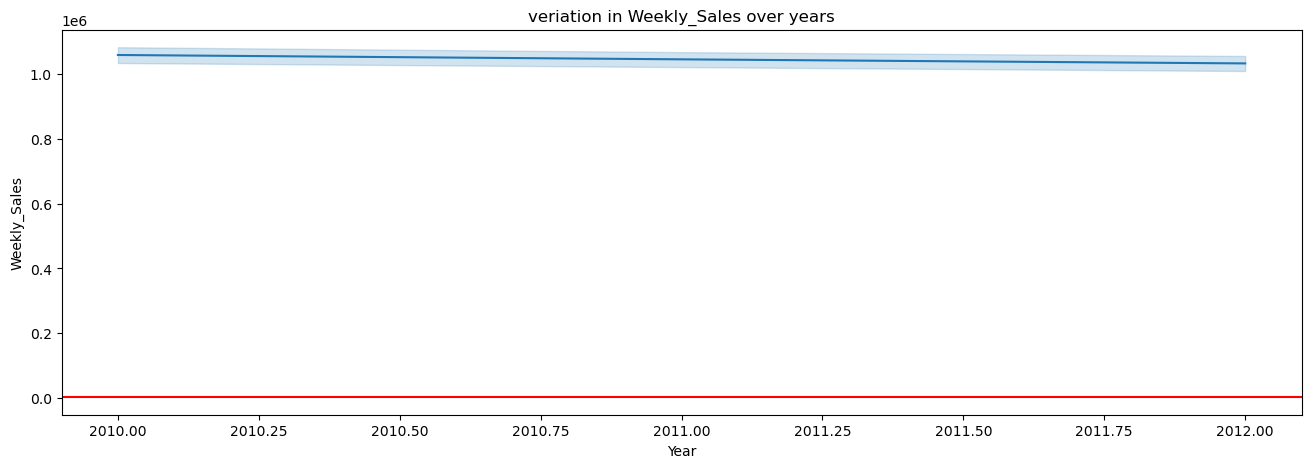

In [17]:
plt.figure(figsize=(16,5))
plt.xlabel('Year')
plt.ylabel('Weekly_Sales')
plt.title('veriation in Weekly_Sales over years')
plt.axhline(y=data.year.mean(),color='r')
sns.lineplot(data=data,x='year',y='Weekly_Sales')
plt.show()


In [18]:
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,5,283178.12,0,71.10,2.603,212.226946,6.768,2010,1,10
1,15,566945.95,0,59.69,2.840,132.756800,8.067,2010,1,10
2,42,481523.93,0,86.01,3.001,126.234600,9.003,2010,1,10
3,33,224294.39,0,91.45,3.001,126.234600,9.265,2010,1,10
4,36,422169.47,0,74.66,2.567,210.440443,8.476,2010,1,10
...,...,...,...,...,...,...,...,...,...,...
6430,41,1409544.97,0,39.38,3.760,199.053937,6.195,2012,12,10
6431,16,491817.19,0,43.26,3.760,199.053937,5.847,2012,12,10
6432,10,1713889.11,0,76.03,4.468,131.108333,6.943,2012,12,10
6433,25,697317.41,0,43.74,4.000,216.115057,7.293,2012,12,10


<Axes: xlabel='Unemployment', ylabel='CPI'>

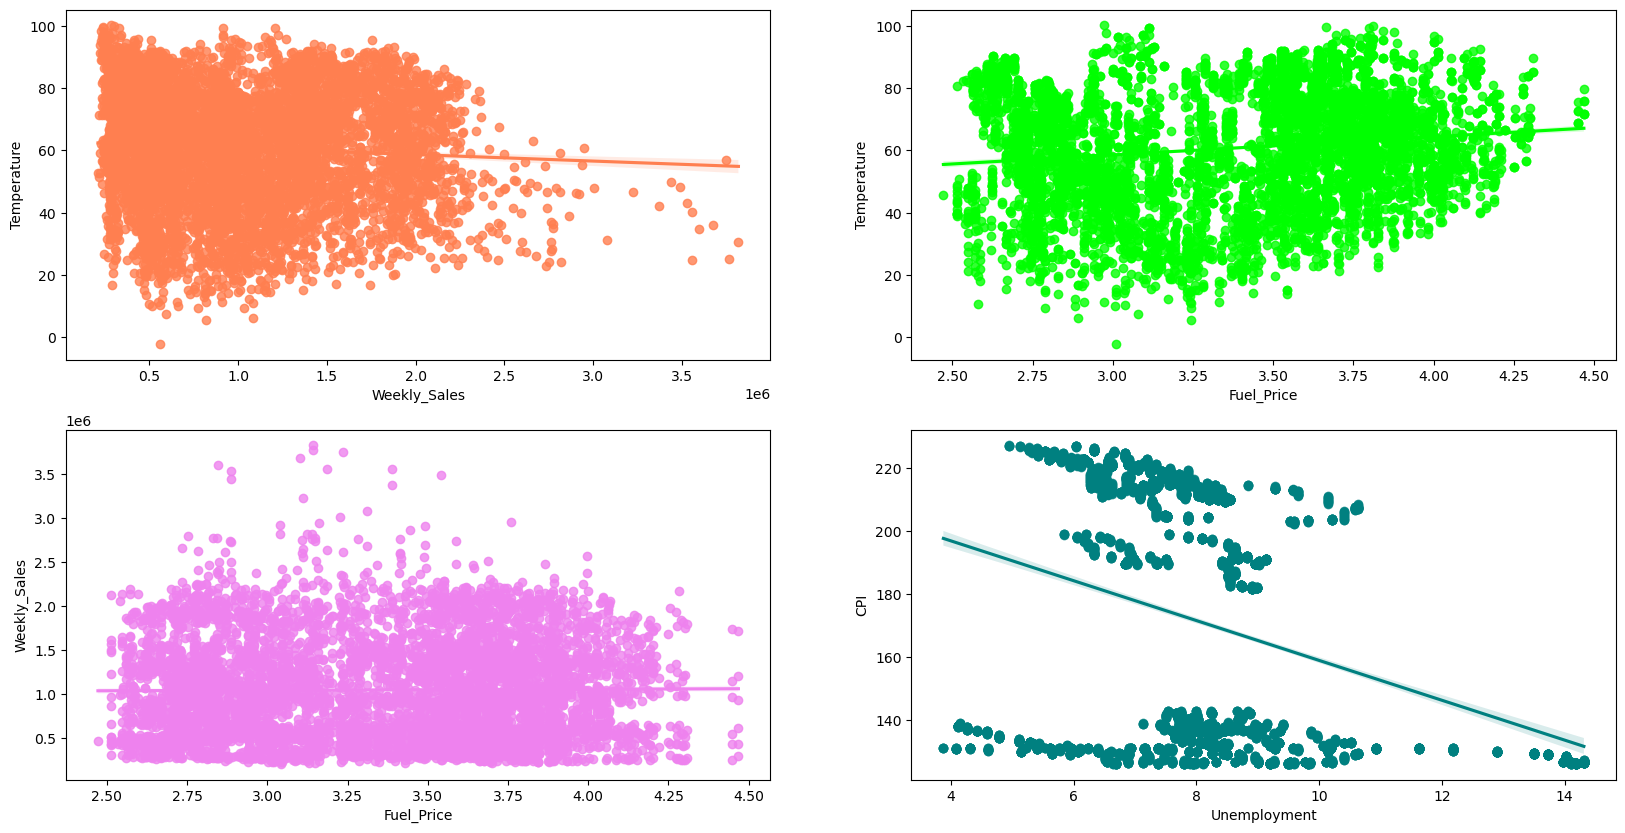

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.regplot(data=data,x='Weekly_Sales',y='Temperature',color='coral')

plt.subplot(2,2,2)
sns.regplot(data=data,x='Fuel_Price',y='Temperature',color='lime')

plt.subplot(2,2,3)
sns.regplot(data=data,x='Fuel_Price',y='Weekly_Sales',color='violet')

plt.subplot(2,2,4)
sns.regplot(data=data,x='Unemployment',y='CPI',color='teal')

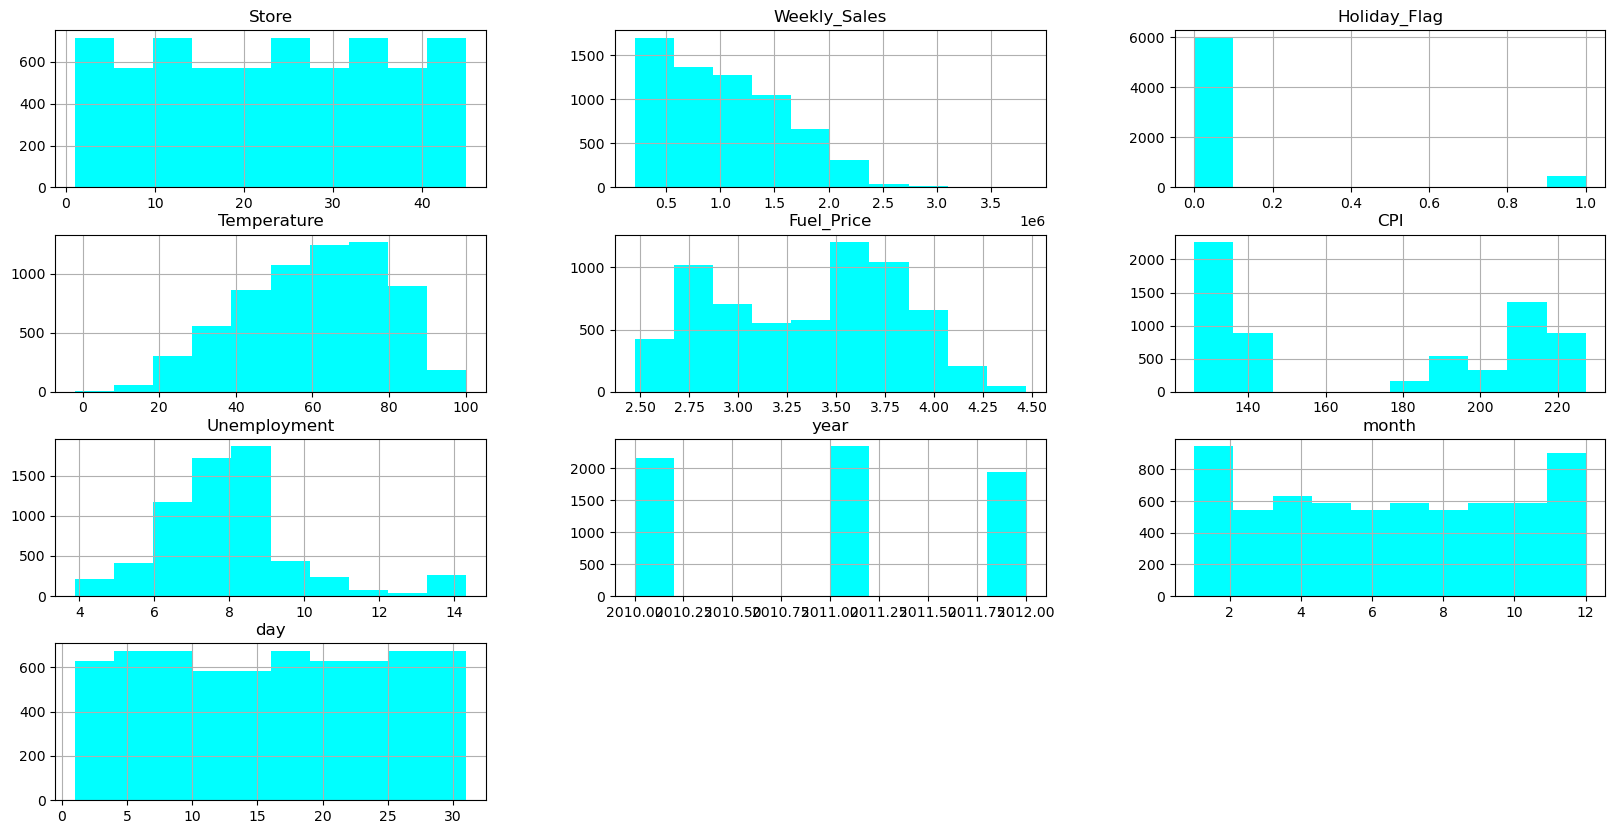

In [20]:
data.hist(figsize=(20,10),color='cyan');

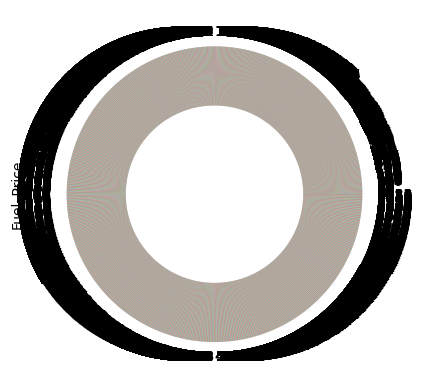

In [23]:
data['Fuel_Price'].plot(kind='pie', wedgeprops=dict(width=0.4))
plt.show()